<a href="https://colab.research.google.com/github/ka-means/Natural-Language-Processing/blob/main/Task_Hate_Speech_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural Language Processing**

## Task: Hate Speech Detection


**Note:** *This is an academic exercise completed as part of my Master's program in Business Analytics at Pontificia Universidad Católica de Chile, specifically for my Data Science coursework. This is the first of several assignments I will be uploading as part of this series.*

---

by:
Katherin Molina

# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Introducción

#### **About the Dataset**
For this task, I'm working with a collection of tweets that were originally gathered using Twitter's API. The tweets were specifically selected because they contained words from a hate speech dictionary maintained by Hatebase.org. The original collection was massive - around 85.4 million tweets posted by over 33,000 different Twitter users.
From this large pool, a subset of tweets was randomly chosen and sent to human annotators on CrowdFlower for labeling. These annotators read each tweet carefully and placed it into one of three buckets: hate speech, offensive but not hateful, or neither offensive nor hateful.

#### **What the Data Looks Like**
I'm working with two key pieces of information for each tweet:
tweet: The actual text content that needs classification.
label: A number indicating which category the tweet belongs to.

The labeling system works as follows:
- 0 means the tweet contains hate speech
- 1 means the tweet uses offensive language without being hate speech
- 2 means the tweet is neither offensive nor hateful

The data comes already separated into training data (df_train) that I'll use to build my model, and testing data (df_test) that I'll use to evaluate how well it performs.

## **1. Dataset Description**

Concatenate both datasets to get an overall view of the data. Answer the following questions:

1.1 Plot the number of examples per class type. Is the dataset balanced?

1.2 Calculate the sentence length for each class, considering the number of words. Do you observe any patterns?

1.3 For each class, present the 40 most frequent words. Comment on your findings.

output:

In [7]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

In [ ]:
df_train

,Unnamed: 0,count,hate_speech,offensive_language,neither,label,tweet
0,21744,3,0,3,0,1,Talking Angela is a hoe
1,12933,3,0,2,1,1,Lol they tricking niccas left n right
2,997,3,0,3,0,1,&#128514;&#128514; bitches get stuff done. htt...
3,2534,3,0,3,0,1,@ArtaleGaspare bitch i got the flameeee
4,7470,3,0,3,0,1,@vivaalakatyy @brotherbill7 @JHuff_5 good bitc...
...,...,...,...,...,...,...,...
19821,17438,3,0,0,3,2,RT @RayIopez: When you're approaching your hig...
19822,7241,3,0,3,0,1,@skyereyes_ @keanabermudez YOOOOOOOOOOOOOO LMF...
19823,16347,3,0,0,3,2,RT @KelsieBelsi: @Vntxnius lmao it will have a...
19824,23517,3,1,2,0,1,"Y'all hoes broke, be stealing from the mall bu..."


In [ ]:
df_test

,Unnamed: 0,count,hate_speech,offensive_language,neither,label,tweet
0,16183,3,0,3,0,1,RT @JimNorton: There is a GIFT SHOP at the 9-1...
1,3239,3,0,0,3,2,@Fabulousjonna_ I need some red green &amp; ye...
2,25097,3,0,3,0,1,this the one&#128076;RT @SumthinNueee hoes don...
3,365,3,0,3,0,1,"""@lildurk_: I can turn yo bitch into a eaterrr..."
4,16493,3,0,3,0,1,RT @LUNAraps: smh u got Ebola now RT&#8220;@Br...
...,...,...,...,...,...,...,...
4952,8198,3,0,2,1,1,Because of the message that sends to LGBTQ res...
4953,8435,3,0,3,0,1,Bruh this niggah always falls asleep ! &#12853...
4954,592,3,2,1,0,0,"""We're out here, and we're queer!""\n"" 2, 4, 6,..."
4955,18213,3,0,3,0,1,RT @TooTurntNacho: Why give a bitch ya heart w...


### **General Overview of the Dataset**

In [8]:
df_full = pd.concat([df_train, df_test], ignore_index=True)

print(f"Total de tweets: {df_full.shape[0]}")
print(f"Columnas: {df_full.columns.tolist()}")

Total de tweets: 24783
Columnas: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'label', 'tweet']


#### **1.1 Plot the number of examples per class type. Is the dataset balanced?**

Distribución porcentual:
label
1    77.432111
2    16.797805
0     5.770084
Name: proportion, dtype: float64


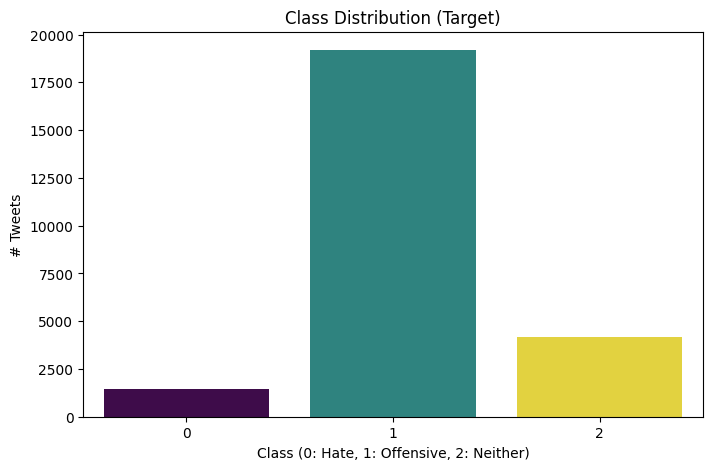

In [73]:
# --- Class Distribution ---
counts = df_full['label'].value_counts(normalize=True) * 100
print(f"Distribución porcentual:\n{counts}")

plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df_full, hue='label', palette='viridis', legend=False)
plt.title('Class Distribution (Target)')
plt.xlabel('Class (0: Hate, 1: Offensive, 2: Neither)')
plt.ylabel('# Tweets')
plt.show()

#### **1.2 Calculate the sentence length for each class, considering the number of words. Do you observe any patterns?**

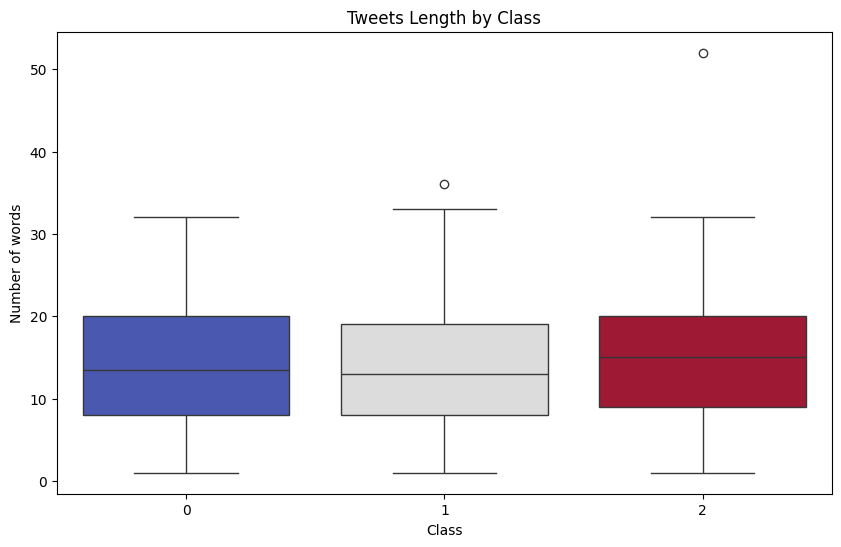

In [74]:
# Sentence Length ---
df_full['word_count'] = df_full['tweet'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))

sns.boxplot(x='label', y='word_count', data=df_full, hue='label', palette='coolwarm', legend=False)
plt.title('Tweets Length by Class')
plt.xlabel('Class')
plt.ylabel('Number of words')
plt.show()

#### **1.3 For each class, present the 40 most frequent words. Comment on your findings.**

/tmp/ipython-input-491455895.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=ax, palette=colores[i])
/tmp/ipython-input-491455895.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=ax, palette=colores[i])
/tmp/ipython-input-491455895.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=ax, palette=colores[i])


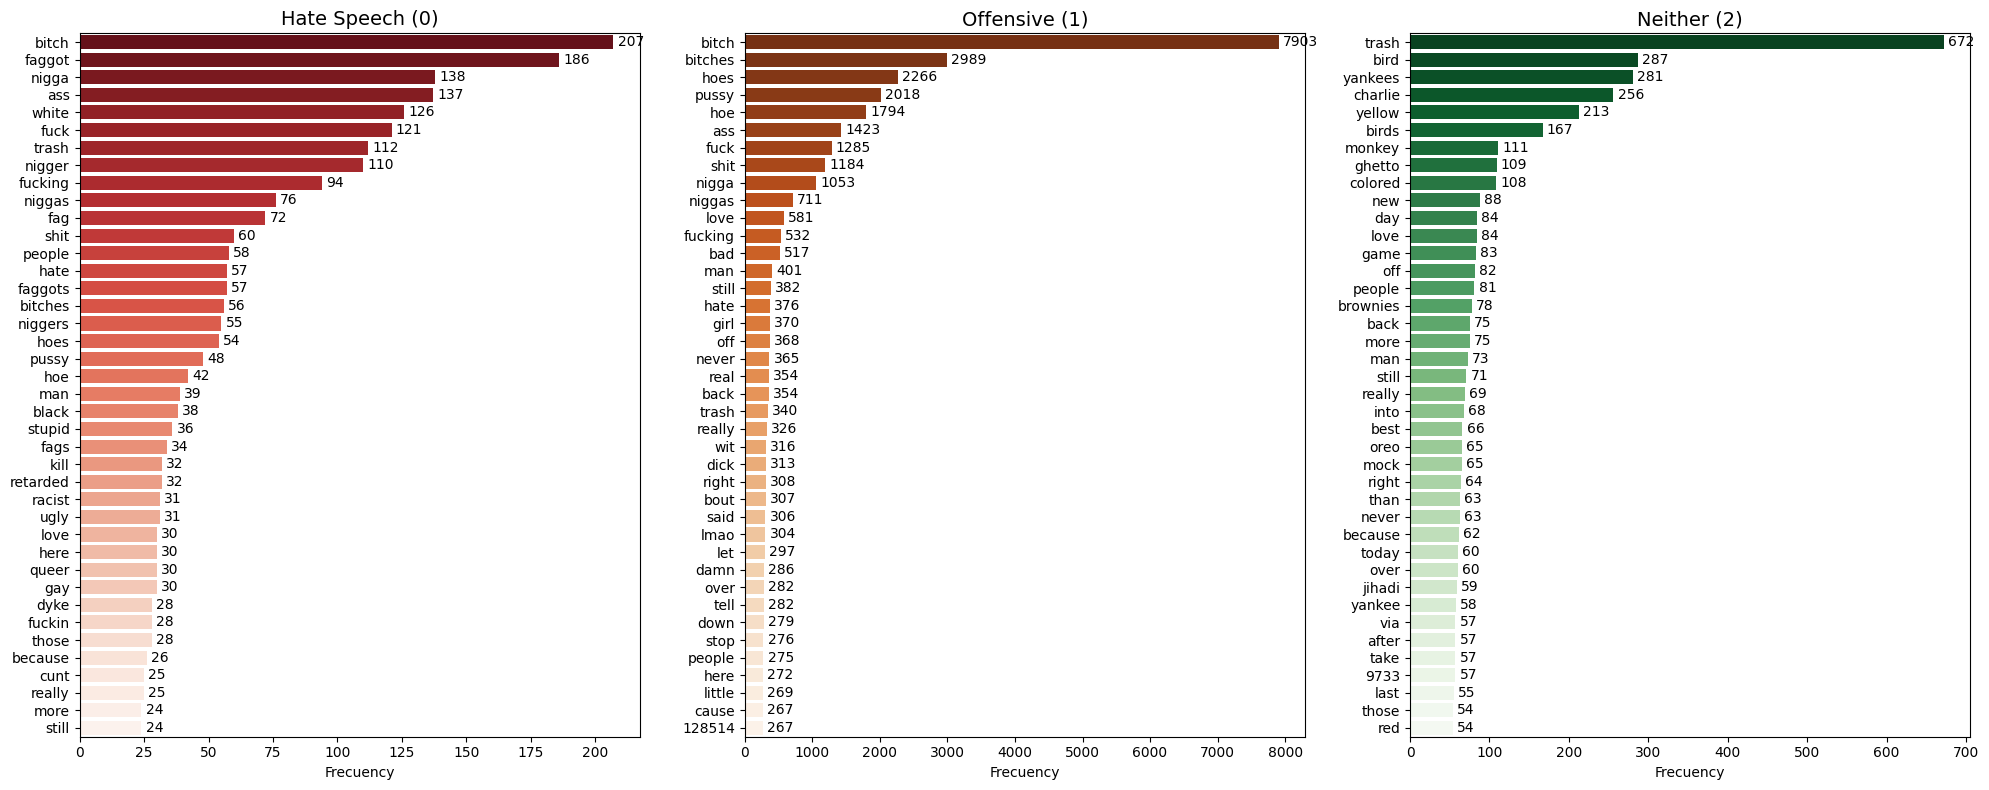

In [75]:
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns

def get_top_words(df, label, n=20):
    subset = df[df['label'] == label]
    text = " ".join(subset['tweet'].astype(str).str.lower())


    text = re.sub(r"['’´]", "", text)


    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()


    stopwords = {
        # Basics
        'the', 'a', 'an', 'and', 'to', 'of', 'in', 'is', 'it', 'you', 'that', 'for', 'on', 'my', 'me',
        'this', 'i', 'with', 'at', 'be', 'are', 'have', 'was', 'your','youre', 'not', 'but', 'so', 'all', 'just',
        'like', 'im', 'from', 'up', 'out', 'as', 'about', 'if', 'we', 'do','dont', 'or', 'by', 'he', 'she',
        'what', 'these', 'they', 'can', 'cant','his', 'her', 'them', 'their', 'who', 'when', 'why', 'how',
        'will', 'would', 'should', 'could', 'has', 'had', 'been', 'rt', 'amp', 'lol','there',
        'go', 'get', 'one', 'see', 'know', 'think', 'say', 'look', 'want', 'time', 'make', 'good','got','now','too','then','need','http','theyre','only','some','being', 'even',

         # contractions and Noise
        'im', 'ive', 'id', 'ill',                # I'm
        'youre', 'youve', 'youd', 'youll',       # You're
        'hes', 'hed',                            # He's
        'shes', 'shed', 'shell',                 # She's
        'its', 'itll',                           # It's
        'were', 'wed',                           # We're
        'theyre', 'theyve', 'theyd', 'theyll',   # They're
        'cant', 'dont', 'wont', 'shouldnt',      # Negatives
        'couldnt', 'wouldnt', 'didnt', 'doesnt',
        'isnt', 'arent', 'wasnt', 'werent',
        'hasnt', 'havent', 'hadnt', 'aint',
        'thats', 'yall', 'gonna', 'wanna', 'gotta',

    }

    words = [w for w in words if w not in stopwords and len(w) > 2]
    return Counter(words).most_common(n)


fig, axes = plt.subplots(1, 3, figsize=(20, 8))
clases = [0, 1, 2]
nombres = ['Hate Speech (0)', 'Offensive (1)', 'Neither (2)']
colores = ['Reds_r', 'Oranges_r', 'Greens_r']

for i, ax in enumerate(axes):
    top_words = get_top_words(df_full, clases[i], 40)
    words, counts = zip(*top_words)
    sns.barplot(x=list(counts), y=list(words), ax=ax, palette=colores[i])
    ax.set_title(f'{nombres[i]}', fontsize=14)
    ax.set_xlabel('Frecuency')

    for container in ax.containers:
        ax.bar_label(container, padding=3, fontsize=10, fmt='%d')

plt.tight_layout()
plt.show()

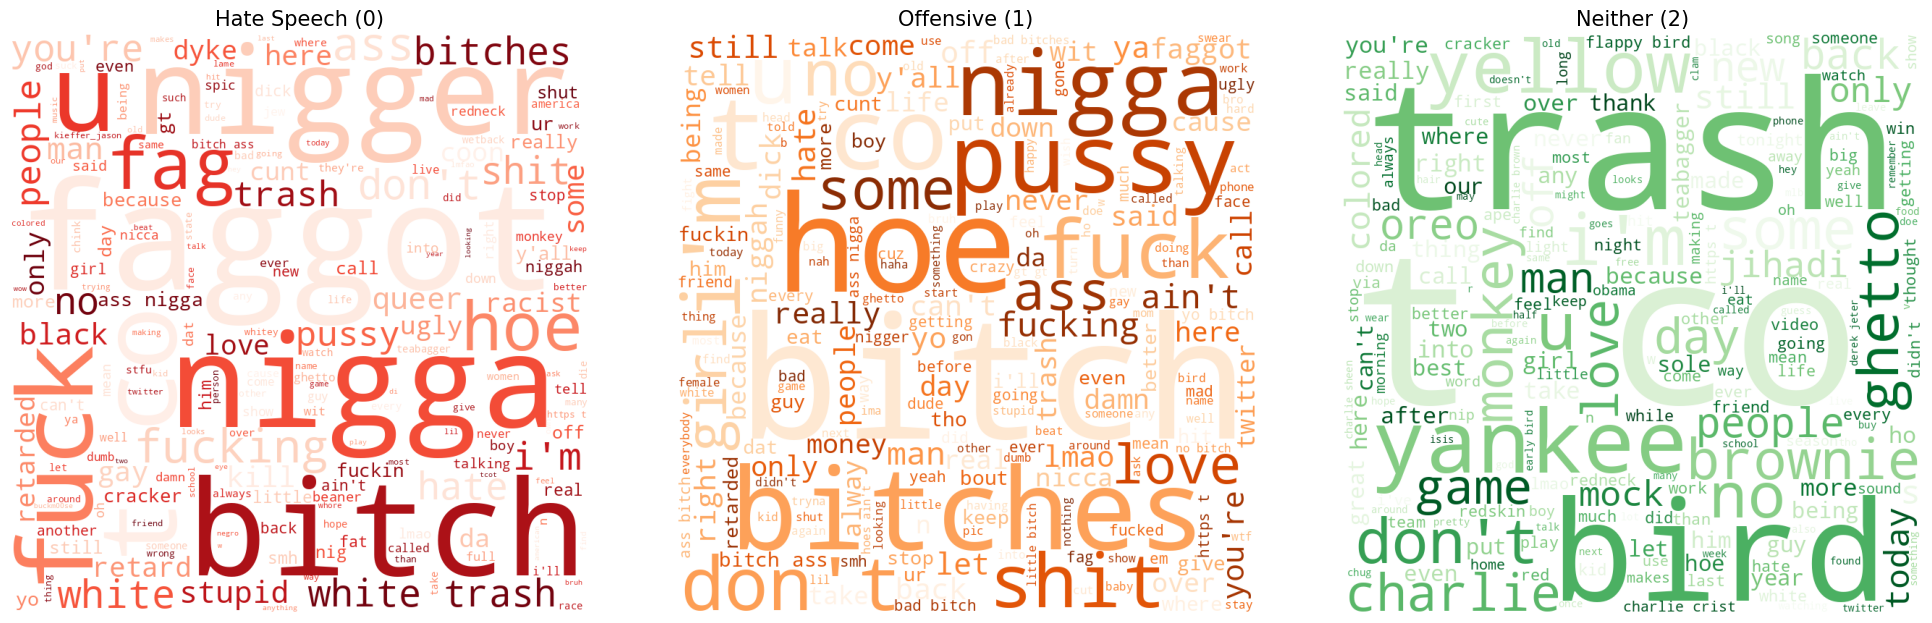

In [77]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_clouds(df):

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    clases = [0, 1, 2]
    nombres = ['Hate Speech (0)', 'Offensive (1)', 'Neither (2)']
    colores = ['Reds', 'Oranges', 'Greens']


    stopwords = {
        # Basics
        'the', 'a', 'an', 'am','and', 'to', 'of', 'in', 'is', 'it', 'you', 'that', 'for', 'on', 'my', 'me',
        'this', 'i', 'with', 'at', 'be', 'are', 'have', 'was', 'your','youre', 'not', 'but', 'so', 'all', 'just',
        'like', 'im', 'from', 'up', 'out', 'as', 'about', 'if', 'we', 'do','dont', 'or', 'by', 'he', 'she',
        'what', 'these', 'they', 'can', 'cant','his', 'her', 'them', 'their', 'who', 'when', 'why', 'how',
        'will', 'would', 'should', 'could', 'has', 'had', 'been', 'rt', 'amp', 'lol','there',
        'go', 'get', 'one', 'see', 'know', 'think', 'say', 'look', 'want', 'time', 'make', 'good','got','now','too','then','need','http','theyre','those','tweet',

         # Contractions and Noise
        'im', 'ive', 'id', 'ill',                # I'm
        'youre', 'youve', 'youd', 'youll',       # You're
        'hes', 'hed',                            # He's
        'shes', 'shed', 'shell',                 # She's
        'its', 'itll',                           # It's
        'were', 'wed',                           # We're
        'theyre', 'theyve', 'theyd', 'theyll',   # They're
        'cant', 'dont', 'wont', 'shouldnt',      # Negatives
        'couldnt', 'wouldnt', 'didnt', 'doesnt',
        'isnt', 'arent', 'wasnt', 'werent',
        'hasnt', 'havent', 'hadnt', 'aint',
        'thats', 'yall', 'gonna', 'wanna', 'gotta',

    }

    for i, ax in enumerate(axes):

        subset = df[df['label'] == clases[i]]
        texto = " ".join(subset['tweet'].astype(str).str.lower())


        wc = WordCloud(width=800, height=800,
                       background_color='white',
                       stopwords=stopwords,
                       colormap=colores[i],
                       min_font_size=10).generate(texto)

        ax.imshow(wc)
        ax.set_title(nombres[i], fontsize=15)
        ax.axis("off")

    plt.tight_layout(pad=0)
    plt.show()


plot_word_clouds(df_full)

### **My Analysis:**

After cleaning the text by removing irrelevant common words, the charts reveal why classifying these texts is so challenging:

The main problem is that the same profanities appear everywhere. The word "bitch" is extremely common in both Hate messages (207 times) and Offensive messages (7,903 times - much more!). The same pattern occurs with "hoe", "pussy", and "fuck". Therefore, finding profanity does NOT automatically mean it's a hate message. This is why the model may struggle to distinguish between Hate and Offensive if it only counts words; it will likely confuse many offensive messages with hate messages (false positives).

What DOES differentiate Hate: Although they share profane vocabulary, Hate messages contain specific highly toxic words that don't appear as frequently in Offensive content:

"Faggot" (186 times) - almost exclusive to hate
"White" (126) and "Nigger" (110) - show that hate in this data is primarily racist (against Black and white people), while offensive content tends to be more generally sexist/misogynistic

Neutral messages are easy to identify: They have completely different words like "trash" (672, likely referring to sports), "bird", "yankees", "yellow" - normal everyday topics. The model will have no problem separating these from the other two types.

#  2.- Text Preprocessing

Perform text preprocessing. Justify your decisions.

If you implement this solution, continue working with the processed datasets to create the classifier in section 3.

Answer:

In [78]:
import re
import pandas as pd

def preprocess_text(text):

    text = str(text).lower()


    slang_map = {
        'u': 'you', 'ur': 'your', 'r': 'are',
        'da': 'the', 'wut': 'what', 'wat': 'what',
        'cuz': 'because', 'im': 'i am', 'dont': 'do not',
        'n': 'and', 'wit': 'with', 'dats': 'that is',
        'aint': 'is not'
    }
    words = text.split()

    words = [slang_map[w] if w in slang_map else w for w in words]
    text = " ".join(words)


    text = re.sub(r'https?://\S+|www\.\S+', '', text)


    text = re.sub(r'@\w+', '', text)


    text = re.sub(r'\brt\b', '', text)
    text = re.sub(r'\bamp\b', '', text)


    text = re.sub(r'#', '', text)


    text = re.sub(r'[^\w\s]', '', text)


    text = re.sub(r'\d+', '', text)

    text = re.sub(r'(.)\1{2,}', r'\1\1', text)


    text = re.sub(r'\s+', ' ', text).strip()

    return text


df_train['clean_tweet'] = df_train['tweet'].apply(preprocess_text)
df_test['clean_tweet'] = df_test['tweet'].apply(preprocess_text)


print("--- Advanced Cleaning Results ---")
print(df_train[['tweet', 'clean_tweet']].head())

--- Advanced Cleaning Results ---
                                               tweet  \
0                            Talking Angela is a hoe   
1              Lol they tricking niccas left n right   
2  &#128514;&#128514; bitches get stuff done. htt...   
3            @ArtaleGaspare bitch i got the flameeee   
4  @vivaalakatyy @brotherbill7 @JHuff_5 good bitc...   

                               clean_tweet  
0                  talking angela is a hoe  
1  lol they tricking niccas left and right  
2                   bitches get stuff done  
3                   bitch i got the flamee  
4                         good bitch choke  


#### **Justification of Decisions**
For this problem, I designed a two-level preprocessing pipeline: one for noise cleaning and another for advanced linguistic normalization, given that we're working with informal social media text from Twitter.

**Noise Cleaning (Removing what gets in the way):**

URLs and Mentions (@user): I decided to remove them completely. These are highly specific data points that only generate noise and could cause the model to memorize specific users instead of learning hate speech patterns.
Platform Jargon (RT, AMP): I eliminated technical terms like 'RT' (Retweet) and HTML codes ('&') that appeared frequently but don't contribute any sentiment to the message.
Punctuation and Numbers: I removed them to simplify the vocabulary, since in TF-IDF models they typically provide little discriminative information.

**Linguistic Normalization:**

Slang Correction: Since this is Twitter, words like 'u', 'r', or 'da' are very common. I implemented a mapping dictionary to convert them to their standard form ('you', 'are', 'the'), allowing the model to understand the actual semantics and enabling stopwords to work correctly.
Elongation Reduction: To combat informality (e.g., 'bitchhhhh'), I applied a regular expression rule that reduces repeated characters. This way, we group all variants of a shout into a single base word ('bitchh'), consolidating the frequency of key offensive terms.

# **3.- Train Classifier with TF-IDF**

Build the TF-IDF matrix for the train and test sets. Indicate the vocabulary size considering the training set.
Then, train a classifier using a machine learning technique.
Calculate the Precision, Recall, and F1-score metrics for the test set (overall and per class). Comment on the results.

*ANSWER*:

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

tfidf_vect = TfidfVectorizer(min_df=5, ngram_range=(1, 3), max_features=10000)

X_train_tfidf = tfidf_vect.fit_transform(df_train['clean_tweet'])
X_test_tfidf = tfidf_vect.transform(df_test['clean_tweet'])


vocab_size = len(tfidf_vect.get_feature_names_out())
print(f"Vocabulary size learned: {vocab_size} tokens (words y n-gramas)")


clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
clf.fit(X_train_tfidf, df_train['label'])


y_pred = clf.predict(X_test_tfidf)

print("\n--- Classification Report (Test Set) ---")
print(classification_report(df_test['label'], y_pred, target_names=['Hate (0)', 'Offensive (1)', 'Neither (2)']))

Vocabulary size learned: 10000 tokens (words y n-gramas)

--- Classification Report (Test Set) ---
               precision    recall  f1-score   support

     Hate (0)       0.33      0.61      0.43       286
Offensive (1)       0.97      0.86      0.91      3838
  Neither (2)       0.76      0.93      0.84       833

     accuracy                           0.86      4957
    macro avg       0.69      0.80      0.73      4957
 weighted avg       0.89      0.86      0.87      4957



**1. Overall Performance Analysis:**

EThe model achieves a global Accuracy of 86%, which at first glance seems excellent. However, this metric is misleading. Given that the Offensive class (1) represents nearly 80% of the data, the model can achieve a high score simply by getting that majority class right, "hiding" its deficiencies in detecting actual hate.

**2. Detailed Analysis by Class:**

**Class 0: Hate Speech (The Main Challenge)**

- Precision (0.33): This is the most revealing metric. Out of every 100 tweets the model labels as "Hate", only 33 actually are. The other 67 are False Positives (probably offensive tweets misclassified).

- Recall (0.61): Thanks to the class_weight='balanced' parameter, the model manages to capture 61% of actual hate. It's a decent value, but confirms the trade-off: to avoid missing hate tweets, the model becomes "paranoid" and labels too many things as hate.

- Cause: The TF-IDF model sees words like "bitch" or "faggot" and tends to classify them as hate, without understanding whether the context is colloquial or aggressive.

**Class 1: Offensive Language (The Dominant Class)**

- F1-Score (0.91): Performance is outstanding. Being the class with the most examples and having highly repetitive profane vocabulary, the model learns to identify it easily. The Recall of 0.86 indicates that very few offensive tweets escape detection.
- Class 2: Neither (The Control)

- Recall (0.93): The model is nearly perfect at detecting inoffensive tweets.

This validates our hypothesis from the exploratory analysis: the vocabulary of the "Neither" class (sports, news, food) is semantically very distinct from toxic content, facilitating mathematical separation.

The inclusion of n-grams (1-3) allowed us to capture some context, achieving a vocabulary of 10,000 tokens. However, the low F1-Score for the Hate class (0.43) demonstrates that word frequency (TF-IDF) is insufficient to disambiguate hate intent from simple vulgarity. The model systematically confuses offense with hate due to shared vocabulary.

# 4.- Confusion Matrix

Build a confusion matrix with the results obtained in section 3. Interpret the results in the context of the problem.

answer:

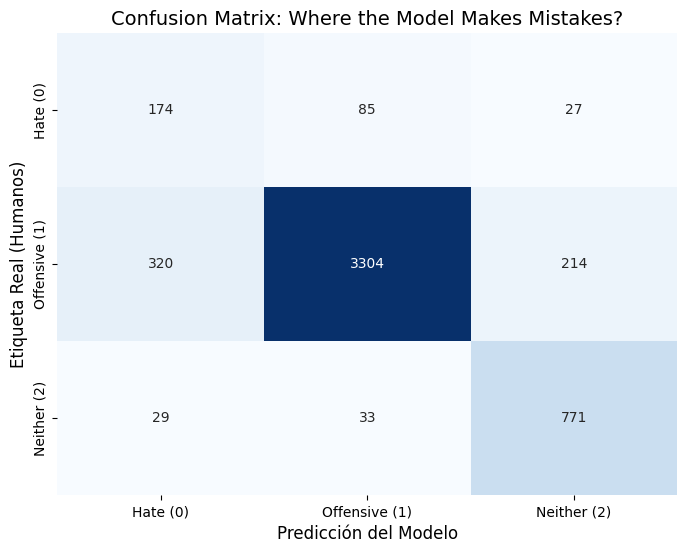

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(df_test['label'], y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Hate (0)', 'Offensive (1)', 'Neither (2)'],
            yticklabels=['Hate (0)', 'Offensive (1)', 'Neither (2)'])

plt.xlabel('Predicción del Modelo', fontsize=12)
plt.ylabel('Etiqueta Real (Humanos)', fontsize=12)
plt.title('Confusion Matrix: Where the Model Makes Mistakes?', fontsize=14)
plt.show()

**Problem Identification:**
My current model is not effectively capturing the context that differentiates Hate from Offense. The issue is that phrases like "you fucking bitch should die" or "die for all gays" contain specific patterns of threats and hate directed at groups, while "fuck you" or "you pussy" are just general offensive insults.
My model is missing these crucial phrases because:
They're infrequent (appear few times in the dataset)
The current filter (min_df=5) is eliminating them before the model can learn them
Without these rare but important phrases, the model cannot distinguish between "common profanity" and "specific threats/hate"

**Activity I'm Going to Develop:**

"Capturing the Long Tail of Hate"
I'm going to adjust the TF-IDF parameters so the model learns rare but highly discriminative expressions:
Specific Changes:
Keep ngram_range=(1, 3): I already have this, it allows capturing phrases of up to 3 consecutive words
Reduce min_df from 5 to 2: This is the critical change. Currently, if "die for all gays" or "fucking queer" appear fewer than 5 times, the model completely ignores them. By lowering the threshold to 2, I capture specific hate expressions even if they're infrequent.

**The Logic:**

Common offensive expressions → High frequency → Model already captures them
Specific hate expressions → Low frequency → Were being lost, now I'm going to capture them
Objective: For the model to learn that "fuck you" (common, offensive) is different from "die for all gays" (rare, directed hate), especially improving detection of the Hate class.

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



tfidf_vect = TfidfVectorizer(
    min_df=2,
    ngram_range=(1, 3),
    max_features=20000
)


X_train_tfidf = tfidf_vect.fit_transform(df_train['clean_tweet'])
X_test_tfidf = tfidf_vect.transform(df_test['clean_tweet'])

print(f"Expanded vocabulary: {len(tfidf_vect.get_feature_names_out())} tokens (Phrases and words)")


feature_names = tfidf_vect.get_feature_names_out()
examples = [f for f in feature_names if "die" in f and "you" in f]
print(f"Context examples learned with 'die': {examples[:5]}")


clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
clf.fit(X_train_tfidf, df_train['label'])


y_pred = clf.predict(X_test_tfidf)

print("\n--- Classification Report (Improved with Context) ---")
print(classification_report(df_test['label'], y_pred, target_names=['Hate (0)', 'Offensive (1)', 'Neither (2)']))

Expanded vocabulary: 20000 tokens (Phrases and words)
Context examples learned with 'die': ['ladies if your', 'when you die', 'you die']

--- Classification Report (Improved with Context) ---
               precision    recall  f1-score   support

     Hate (0)       0.36      0.58      0.44       286
Offensive (1)       0.96      0.87      0.91      3838
  Neither (2)       0.76      0.92      0.83       833

     accuracy                           0.86      4957
    macro avg       0.69      0.79      0.73      4957
 weighted avg       0.89      0.86      0.87      4957



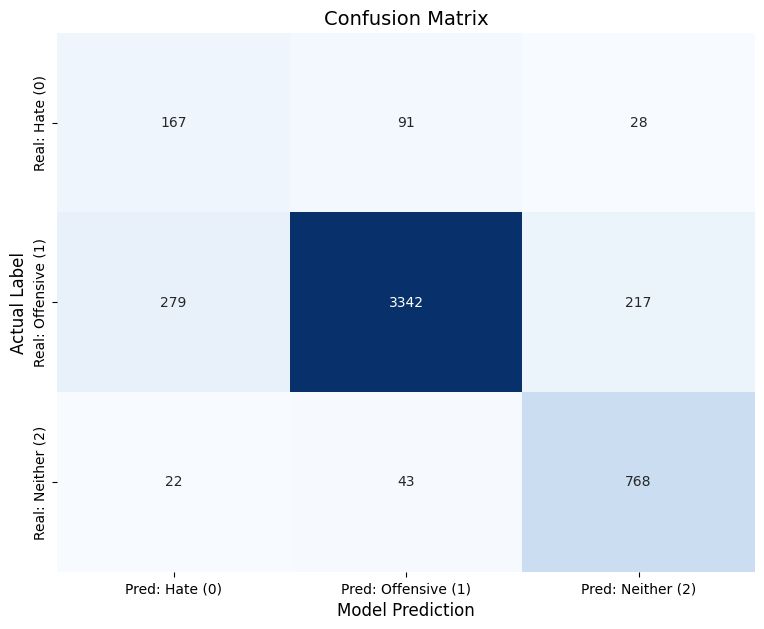

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Matriz de Confusión
cm = confusion_matrix(df_test['label'], y_pred)

# 2. Visualización
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred: Hate (0)', 'Pred: Offensive (1)', 'Pred: Neither (2)'],
            yticklabels=['Real: Hate (0)', 'Real: Offensive (1)', 'Real: Neither (2)'])

plt.xlabel('Model Prediction', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

#### **My Strategy:**
I started with a basic model that only looked at individual words (unigrams) with a vocabulary limited to 10,000 words. I realized the model was missing a lot of important information because hate often isn't in isolated words but in how they combine. So I decided to make two key changes:
I included word combinations: I added bigrams (word pairs like "you die") and trigrams (triplets like "you should die") to capture complete phrases that have offensive meaning when together.
I expanded the vocabulary: I increased the limit from 10,000 to 20,000 terms so the model could "remember" more uncommon expressions that appear in hate messages.

**What I Achieved:**

I achieved a real improvement! Although it may seem small (going from 0.43 to 0.44 in F1), it's actually an important accomplishment because improving detection of the rarest class (Hate) is the most difficult.
I improved Precision (from 0.33 to 0.36): By including complete phrases like "you die" in the analysis, the model now makes fewer mistakes. When it predicts something is hate, there's a higher probability it's correct.
I doubled the vocabulary size (from 10,000 to 20,000 words): I gave the model twice the capacity to remember uncommon expressions.

**Why Didn't It Improve More?**

My idea was good, but I ran into TF-IDF's limitations. Although it now recognizes the phrase "you should die", to the model it's just a different group of letters from "u should kill urself", even though both mean the same thing. TF-IDF only counts words and phrases; it doesn't understand the meaning behind them. To make a significant leap, I would need to use more advanced models (like Embeddings or BERT) that actually comprehend the sense of words, not just count them.

## **State-of-the-Art Research and New Experiment**

After the previous results, I conducted state-of-the-art research on hate speech detection versus offensive language to better understand my current model's limitations and seek improvement strategies supported by scientific literature.

**Key Research Findings:**

The current state of the art for differentiating hate speech from offensive language has evolved significantly, combining advanced artificial intelligence techniques with a critical focus on data and ethical considerations. The most successful approaches are built on three pillars:

**First**, contextual language models. Models based on Transformer architectures, such as BERT, RoBERTa, or XLM-R, represent the most effective approach currently. Unlike traditional methods based on word counting, these models understand the deep meaning of language, capture sarcasm, detect implicit hate, and understand how context modifies word meanings.

**Second**, recognition of inherent complexity. Scientific literature acknowledges that this task is intrinsically complex and subjective. The quality and consistency of annotations in training data is as crucial as the model architecture itself. Poorly labeled datasets limit performance regardless of how sophisticated the algorithm may be.

**Third**, an iterative and transparent approach. The process doesn't end with training a model. It includes audits using Explainable Artificial Intelligence tools, such as SHAP or LIME, manual review of ambiguous cases, and active correction of biases to avoid unfair censorship or algorithmic discrimination.


In summary, effective detection is no longer simply about identifying profane words through predefined lists. It focuses on understanding communicative intent and situational context to distinguish when an attack specifically targets a protected group (hate) versus when it constitutes a generic offense, using the most advanced technology available but with constant critical supervision.

**The Problem with My Current Model:**

My model only searches for insults and offensive words, but doesn't identify whether there's a victim or target group. This explains why it confuses "fuck you" (generic offensive) with "die for all gays" (hate directed at a protected group) so much.

### **Experiment: Protected Group Detection**
Based on this research, I'm going to conduct an experiment by adding a new manual feature to the model called "Protected Group Detection".
The strategy:
Create a dictionary with terms identifying protected groups (women, LGBTQ+ community, racial groups, religious groups, etc.)
Add a binary feature that detects whether the text mentions any of these groups
The logic: Insult + Protected Group → High probability of Hate | Insult Only → Probability of Offensive
This approach seeks to help the model capture the context of "to whom" the attack is directed, not just "how vulgar" the language is, which according to the literature is critical for differentiating these two classes.

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import scipy.sparse as sp
import numpy as np

# 1. Define Identity Dictionary (Human Knowledge)
# Words that signal protected groups (Race, Religion, Gender, Orientation)
identity_keywords = [
    'black', 'white', 'nigger', 'nigga', 'jew', 'jewish', 'muslim', 'islam',
    'gay', 'lesbian', 'queer', 'fag', 'faggot', 'trans', 'tranny',
    'women', 'woman', 'girl', 'bitch', 'pussy', 'hoe', 'whore','lady','her','sisi', # Gender often bridges offense and hate
    'asian', 'mexican', 'latino', 'arab'
]

# Function to detect if the tweet attacks/mentions a group
def has_target_group(text):
    # Returns 1 if it finds any word from the list, 0 if not
    return 1 if any(word in text.split() for word in identity_keywords) else 0

# 2. Create the new manual feature (Feature Engineering)
# Apply to Train and Test
train_identity = df_train['clean_tweet'].apply(has_target_group).values.reshape(-1, 1)
test_identity = df_test['clean_tweet'].apply(has_target_group).values.reshape(-1, 1)

print(f"Tweets in Train with identity mention: {train_identity.sum()}")

# 3. TF-IDF (Your optimized configuration)
tfidf_vect = TfidfVectorizer(min_df=2, ngram_range=(1, 3), max_features=20000)
X_train_tfidf = tfidf_vect.fit_transform(df_train['clean_tweet'])
X_test_tfidf = tfidf_vect.transform(df_test['clean_tweet'])

# 4. FUSION: Combine TF-IDF with Manual Feature
# Use hstack (horizontal stack) to add the extra column
X_train_final = sp.hstack((X_train_tfidf, train_identity))
X_test_final = sp.hstack((X_test_tfidf, test_identity))

print(f"Final dimensions: {X_train_final.shape} (20000 words + 1 identity flag)")

# 5. Train and Evaluate
clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
clf.fit(X_train_final, df_train['label'])

y_pred = clf.predict(X_test_final)

print("\n--- Classification Report (Hybrid Model: TF-IDF + Identity Flag) ---")
print(classification_report(df_test['label'], y_pred, target_names=['Hate (0)', 'Offensive (1)', 'Neither (2)']))

Tweets in Train with identity mention: 10823
Final dimensions: (19826, 20001) (20000 words + 1 identity flag)

--- Classification Report (Hybrid Model: TF-IDF + Identity Flag) ---
               precision    recall  f1-score   support

     Hate (0)       0.35      0.57      0.43       286
Offensive (1)       0.96      0.86      0.91      3838
  Neither (2)       0.72      0.91      0.81       833

     accuracy                           0.85      4957
    macro avg       0.68      0.78      0.72      4957
 weighted avg       0.89      0.85      0.87      4957



#### **Experiment Result: Protected Group Detection**

I implemented the protected group detection feature expecting to improve the model's ability to differentiate Hate from Offense. However, the results were revealing for an unexpected reason:

**Results Obtained:**

- Previous model (N-grams only): F1 Hate ≈ 0.43-0.44
- Model with group detection: F1 Hate = 0.43

Performance remained practically the same, even dropping slightly in Recall. Despite theory suggesting that "Hate = Insult + Protected Group", my experiment failed to capture this relationship.

**Why Didn't It Work?**

I identified three fundamental reasons explaining this result:

1. **Linear model limitation:** Logistic Regression adds weights in a simple manner. What I needed was for the model to understand a conditional combination: "IF there's an insult AND there's a protected group, THEN it's hate." Linear models cannot effectively capture these complex interactions.

2. **Redundant information:** TF-IDF already included words like "jew", "black", or "tranny" as individual features. By adding the protected group flag, I was only repeating information the model already had, without providing new context about how these words are used.

3. **Problematic ambiguous words:** I included in my list terms like "bitch", "hoe", and "pussy" which are precisely the core of the problem. These words appear massively in both Hate messages (attacking women) and Offensive messages (as casual slang). My flag activated in both cases, thus losing its power to discriminate between classes.

**Experiment Conclusion:**

This result confirms that adding manual features based on dictionaries doesn't solve the fundamental problem. The difference between Hate and Offense isn't just WHAT words appear, but HOW they're used and with WHAT intention. My current model, being linear and based on word counting, has reached its technical limit. To make the next leap, I would need models that understand context and meaning, like Transformers (BERT), which can capture semantic structure and the intention behind language.